#Monitoria 05: Self Organizing Maps and Multilayer Perceptron

Autores: Hugo Amorim - 2020.3 (haan2@ecomp.poli.br), Ana Catarina Fonseca - 2020.1

Duvidas: acgfp@ecomp.poli.br

Este documento foi criado para a disciplina de Inteligencia Artificial do curso de Engenharia da Computação da UPE, ministrada pelo Prof. Fernando Buarque. 

#Self-Organizing Maps (SOM)

SOM é utilizado amplamente em mineração de dados, representação de dados multidimensionais e análise de relações entre variáveis. 
Passo-a-passo:

1. iniciar pesos
2. selecionar input
3. calcular distancia euclidiana
4. atualizar pesos
5. voltar para 2


[MiniSOM](https://github.com/JustGlowing/minisom)
[simpSOM](https://github.com/fcomitani/SimpSOM)

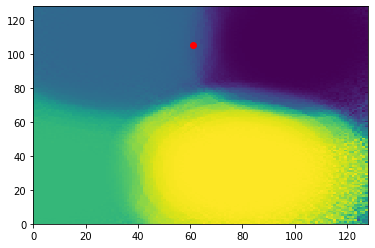

In [ ]:
# ----- IMPORTS ----- 
import math
import random
import matplotlib.pyplot as plt

# ----- INPUTS TREINAMENTO -----
inputs = [[0,0,0],
          [0,0,1],
          [1,1,0],
          [1,1,1]]

# ----- PARAMETROS -----
NUMERO_NODES = 128 #tamanho do gráfico
# a representaçao sera 2d, logo o numero de nodes sera NUMERO_NODES^2
DIMENSAO = len(inputs[0]) #informações q tem em cada input
RAIO_INICIAL = NUMERO_NODES/2 # area q vai ser afetada depois q eu inicializar um determinado nó
ITERACOES = 500
TAXA_APRENDIZADO = 0.2



# ----- CLASSES E FUNCOES -----
class node:
  def __init__(self, pesos):
    self.pesos = []
    for i in pesos:
      self.pesos.append(i)
  
  #DISTANCIA ENTRE O NO E O INPUT
  def distancia(self, pesos):
    distancia = 0
    for index, i in enumerate(pesos):
      distancia += (i - self.pesos[index])**2
    return math.sqrt(distancia)

#DISTANCIA ENTRE DOIS NOS
def dist_nodes(node1, node2):
  aux = 0
  aux += (node1[0] - node2[0])**2
  aux += (node1[1] - node2[1])**2
  return math.sqrt(aux)

#MELHOR POSICAO = MENOR DISTANCIA. CONJUNTO INDICES-VALOR
def melhor_posicao(weights, input):
  best = [0, 0]
  best_dist = 999999999999
  for index_i, i in enumerate(weights):
    for index_j, j in enumerate(i):
      node_dist = j.distancia(input)
      if node_dist < best_dist:
        best_dist = node_dist
        best = [index_i, index_j]
  return best + [best_dist]

#RAIO DE IMPACTO DEPOIS QUE O NO FOI ESCOLHIDO - QUE OUTROS NOS VAO SER AFETADOS POR ESTA ESCOLHA?
def raio(iteracao_atual):
  return RAIO_INICIAL*math.exp(-(iteracao_atual/(ITERACOES/math.log(RAIO_INICIAL))))

def aprendizado(iteracao_atual):
  return TAXA_APRENDIZADO*math.exp(-(iteracao_atual/(ITERACOES/math.exp(TAXA_APRENDIZADO))))

# ----- INICIALIZANDO ALGORITMO -----
# inicializando pesos aleatoriamente
nodes = []
for i in range(NUMERO_NODES):
  node_line = []
  for j in range(NUMERO_NODES):
    node_weight = []
    for k in range(DIMENSAO):
      node_weight.append(random.random())
    node_line.append(node(node_weight))
  nodes.append(node_line)

for iteracao in range(ITERACOES):
  #pega um input aleatorio
  input = random.sample(inputs, 1)[0]

  best_atual = melhor_posicao(nodes, input)
  raio_atual = raio(iteracao)
  aprendizado_atual = aprendizado(iteracao)


  #pra todos os nos -> verifica se esta dentro do raio de atualizacao
  #calcula a taxa de proximidade e atualiza o peso
  for i in range(NUMERO_NODES):
    for j in range(NUMERO_NODES):
      distancia = dist_nodes(best_atual[:2], [i,j])
      if distancia < raio_atual:
        taxa_de_proximidade = math.exp(-(distancia**2 / (2*(raio_atual**2))))
        for index, k in enumerate(input):
          aux = aprendizado_atual * taxa_de_proximidade * (k - nodes[i][j].pesos[index])
          nodes[i][j].pesos[index] += aux


# ----- Representação visual da distribuição dos pesos -----
lista = []
for i in range(NUMERO_NODES):
  node_line = []
  for j in range(NUMERO_NODES):
    node_line.append(sum(nodes[i][j].pesos))
  lista.append(node_line)


plt.pcolormesh(lista)

# ------ Avaliação de posição de um novo input -----
novo_input = [0.8, 0.8, 0.8]
best_novo_input = melhor_posicao(nodes, novo_input)
plt.plot(best_novo_input[0], best_novo_input[1], 'ro')

plt.show() 

[exemplo](https://github.com/JustGlowing/minisom/blob/master/examples/ColorQuantization.ipynb)

  Created wheel for minisom: filename=MiniSom-2.2.7-cp37-none-any.whl size=8609 sha256=ced3047aee836dcf32131754cff61d24bb322c1f9261dd67feda74ae69807f9d
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 ...
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]]
training...
quantization...


/usr/local/lib/python3.7/dist-packages/minisom.py:197: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +
/usr/local/lib/python3.7/dist-packages/minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: 'shape' argument should be used instead of 'dims'


building new image...
done.


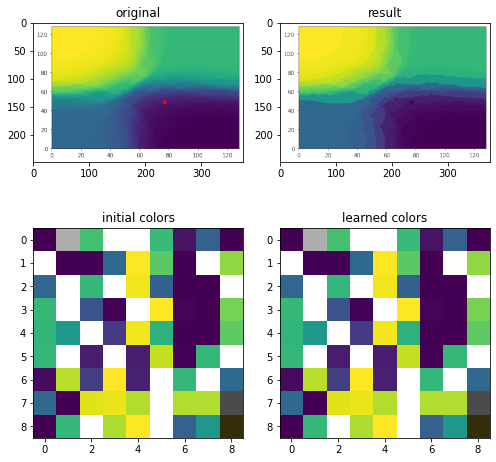

In [ ]:
!pip install minisom

import sys
sys.path.insert(0, '../')
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

# read the image
img = plt.imread('/content/transferir2.png')
# print(img)
# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 4))
print(pixels)
# SOM initialization and training
print('training...')
som = MiniSom(9, 9, 4, sigma=0.8,
              learning_rate=0.3, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 1000)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

#Redes Neurais Artificiais - Perceptron Multicamadas (MLP)


A rede neural mais simples é o perceptron, que é capaz de resolver problemas linearmente separáveis:

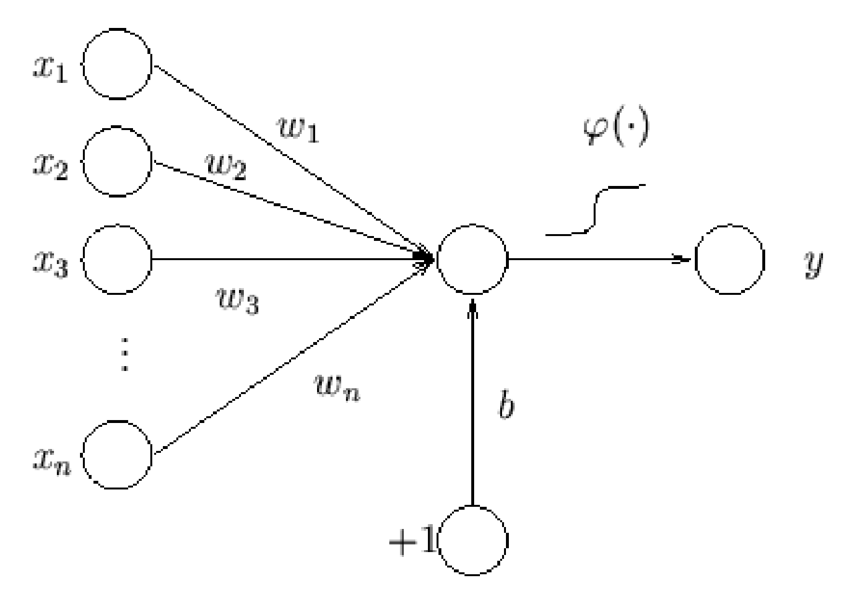

Enquanto o perceptron de uma unica camada possa resolver problemas lineares, ele é incapaz de resolver problemas mais complexos. Para isso podemos utilizar o Perceptron Multicamadas.

Etapas do Perceptron Multicamadas:

**1º Passo: Inicialização**
- Atribuir valores aleatórios para os pesos e viés

**2º Passo: Ativação**
- Calcular os valores dos neurônios da camada oculta
- Calcular os valores dos neurônios da camada de saída

**3º Passo: Treinar os Pesos**
- Calcular os erros dos neurônios das camadas de saída e oculta
- Calcular a correção dos pesos
- Atualizar os pesos dos neurônios das camadas de saída e oculta

**4º Passo: Iteração**
- Repetir o processo a partir do passo 2 até que satisfaça o critério de erro

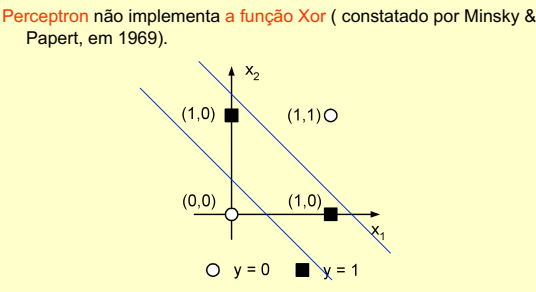

Uma lib que implementa o MLP é o [scikitlearn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

outro [link](https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9) pra implementação diferente do mlp 

In [ ]:
import random
import math

# Dados de entrada para MLP

# Os indices 0, 1 e 2 são entradas e o ultimo é a saida
entradas = [[0, 0, 0],
            [0, 0, 1],
            [0, 1, 0],
            [0, 1, 1],
            [1, 0, 1],
            [1, 1, 0],
            [1, 1, 1]]
resultado_esperado = [0, 1, 0, 1, 1, 0, 0]

numero_inputs = len(entradas[0])
numero_output = 1
camada_oculta = 5
taxa_de_aprendizado = 0.3

In [ ]:
pesos_inputs_hidden = []
pesos_hidden_output = []
bias_hidden = []
bias_output = []

# Inicializa os pesos e os bias
# Vai ter pesos entre camada oculta e entrada, camada oculta e saida,
# vai ter bias das camadas ocultas e bias da saida

def iniciar_aleatoriamente(tamanho, item):
  for i in range(tamanho):
    item.append(random.random()*2 -1)

iniciar_aleatoriamente(numero_inputs * camada_oculta, pesos_inputs_hidden)
iniciar_aleatoriamente(numero_output * camada_oculta, pesos_hidden_output)
iniciar_aleatoriamente(camada_oculta * camada_oculta, bias_hidden)
iniciar_aleatoriamente(numero_output * camada_oculta, bias_output)


#funcao de ativacao
def sigmoid(x):
  return 1.0/(1.0  + math.exp(-x))

def sigmoid_derivada(x):
  # No caso x deve ser um valor q ja passou pela sigmoid
  return x * (1 - x)

#Vai fazendo a soma ponderada por pesos pra cada par entrada - camada
#É APENAS UMA COMBINAÇÃO LINEAR
def valor_saida(entrada, pesos, indice, bias, tamanho):
  valor_camada = 0
  for i in range(0, len(entrada)):
    valor_camada += pesos[i*tamanho + indice]*entrada[i]
  valor_camada += bias
  valor_camada = sigmoid(valor_camada)
  return valor_camada

def gerar_solucao(entrada, pesos_input, pesos_output, bias_hidden, bias_output):

  # dada uma entrada calcula a saida de uma camada oculta
  camadas_oculta = []
  for i in range(0, camada_oculta):
    camadas_oculta.append(valor_saida(entrada, pesos_input, i, bias_hidden[i], camada_oculta))
  
  # dada o valor da saida de uma camada oculta gera um valor de output
  output = valor_saida(camadas_oculta, pesos_hidden_output, 0, bias_output[0], numero_output)

  return output

def treinar_rede(inputs, solucoes, pesos_inputs_hidden, pesos_hidden_output):
  
  for p in range(0, 5000):
    for i in range(0, len(inputs)):
      # dada uma entrada calcula a saida de uma camada oculta
      camadas_oculta = []
      for j in range(0, camada_oculta):
        camadas_oculta.append(valor_saida(inputs[i], pesos_inputs_hidden, j, bias_hidden[j], camada_oculta))
    
      # dada o valor da saida de uma camada oculta gera um valor de output
      output = valor_saida(camadas_oculta, pesos_hidden_output, 0, bias_output[0], numero_output)

      # calcula o feedback do output para a camada oculta
      erro = solucoes[i] - output #desejado - calculado
      saida = sigmoid_derivada(output) * erro * taxa_de_aprendizado
      bias_output[0] += saida #por que zero? porque so tem um output. pra fins de simplificacao
      

      # calcula o feedback da camada oculta para os inputs
      erros_camada_oculta = []
      saida_oculta = []
      peso_hidden_total = sum(pesos_hidden_output)
      for j in range(0, camada_oculta):
        #erro da camada oculta especifica - % da influencia da camada no erro
        erros_camada_oculta.append(pesos_hidden_output[j]/peso_hidden_total)
        #multiplica pelo delta (desejado - calculado)
        erros_camada_oculta[-1] *= erro
        #salva a derivada da sigmoide desse valor
        saida_oculta.append(sigmoid_derivada(camadas_oculta[j]))
        #e multiplica a ultima saida com o ultimo erro e a taxa de aprendizagem
        saida_oculta[-1] *= erros_camada_oculta[-1] #multiplica a derivada da sigmoide pelo erro
        saida_oculta[-1] *= taxa_de_aprendizado

      # atualiza pesos entre hidden e output
      for j in range(0, len(pesos_hidden_output)):
        pesos_hidden_output[j] += saida * camadas_oculta[j]

      # atualiza pesos e bias entre input e hidden
      for k in range(0, camada_oculta):
        for j in range(0, len(inputs[i])):
          pesos_inputs_hidden[j*camada_oculta + k] += saida_oculta[k] * inputs[i][j]
        bias_hidden[k] += saida_oculta[k]

# testes
pesos_inputs_hidden = []
pesos_hidden_output = []
bias_hidden = []
bias_output = []

iniciar_aleatoriamente(numero_inputs * camada_oculta, pesos_inputs_hidden)
iniciar_aleatoriamente(numero_output * camada_oculta, pesos_hidden_output)
iniciar_aleatoriamente(camada_oculta * camada_oculta, bias_hidden)
iniciar_aleatoriamente(numero_output * camada_oculta, bias_output)

treinar_rede(entradas,resultado_esperado, pesos_inputs_hidden, pesos_hidden_output)


#Dada uma entrada, qual será a classe de saída?
entrada = [1, 0, 0]
print(entrada)
saida = gerar_solucao(entrada, pesos_inputs_hidden, pesos_hidden_output, bias_hidden, bias_output)

print(saida)
if saida >= 0.5:
  saida = 1
else: 
  saida = 0
print("A classe de saída é: ", saida)

[1, 0, 0]
0.40826895715965067
A classe de saída é:  0
